# ResNet의 Residual Learning 기법을 이용한 Regression Model 성능 측정 실험

1.   가상의 데이터를 생성하여 실험
2.   California 집값 데이터를 바탕으로 실험



## 1) Regression Data Generate : 가상의 데이터를 생성하여 실험

In [0]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


In [0]:
## 표본 데이터 수 = 50000
## 독립변수의 수 = 30
## 종속변수에 더해지는 잡음의 표준편차 = 10

X,y = make_regression(n_samples=50000,n_features=30,noise=5)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state = 42)

In [3]:
print(f"X's dimension = {X.shape}")
print(f"y's dimension = {y.shape}")

X's dimension = (50000, 30)
y's dimension = (50000,)


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.nn import functional as F
from torch.utils.data import Dataset,DataLoader

In [0]:
class MyDataset(Dataset):
    def __init__(self,X,y,transform=torch.tensor):

        self.X = X
        self.y = y
        self.len = len(y)
        self.transform = transform

    def __getitem__(self,index):
        return self.transform(self.X[index]).float(),self.transform(self.y[index]).float()
    def __len__(self):
        return self.len

In [0]:
train_dataset = MyDataset(X_train,y_train)
val_dataset = MyDataset(X_val,y_val)

batch_size = 42
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=train_dataset, batch_size=int(50000*0.2))

### 1.1) 선형회귀모델(single layer model)을 통해 학습

In [0]:
class SingleLayerModel(nn.Module):
    def __init__(self,input_feature=X.shape[1]):
        super(SingleLayerModel,self).__init__()
        self.layer = nn.Linear(input_feature,1)
    def forward(self,x):
        x = self.layer(x)
        return x.squeeze(-1)

In [0]:
cuda_use = True
single_layer_model = SingleLayerModel()

if cuda_use and torch.cuda.is_available():
    single_layer_model.cuda()

criterion = nn.MSELoss()
optimizer = optim.Adam(params=single_layer_model.parameters(),lr=0.01)

In [9]:
plot_list = {'train':[],'val':[]}

for epoch in range(30):
    single_layer_model.train()
    train_losses = []
    for i, data in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, targets = data
        inputs, targets = inputs.cuda(),targets.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = single_layer_model(inputs)
        train_loss = criterion(outputs, targets)
        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss)
    

    single_layer_model.eval()
    for data in val_loader:
        inputs, targets = data
        inputs, targets = inputs.cuda(),targets.cuda()

        outputs = single_layer_model(inputs)

        val_loss = criterion(outputs,targets)
    print(f"{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}")
    print(f"{epoch+1} epoch val loss = {val_loss}")
    print('--------------------------------------------------')
    plot_list['train'].append(sum(train_losses)/len(train_losses))
    plot_list['val'].append(val_loss)
    
            
print('Finished Training')

1 epoch train loss = 16280.2255859375
1 epoch val loss = 13445.5068359375
--------------------------------------------------
2 epoch train loss = 11449.47265625
2 epoch val loss = 9306.091796875
--------------------------------------------------
3 epoch train loss = 7803.76220703125
3 epoch val loss = 6200.3623046875
--------------------------------------------------
4 epoch train loss = 5082.62451171875
4 epoch val loss = 3918.863525390625
--------------------------------------------------
5 epoch train loss = 3117.31787109375
5 epoch val loss = 2310.251220703125
--------------------------------------------------
6 epoch train loss = 1768.9959716796875
6 epoch val loss = 1248.13720703125
--------------------------------------------------
7 epoch train loss = 909.2844848632812
7 epoch val loss = 604.6219482421875
--------------------------------------------------
8 epoch train loss = 416.0173034667969
8 epoch val loss = 260.5111083984375
------------------------------------------------

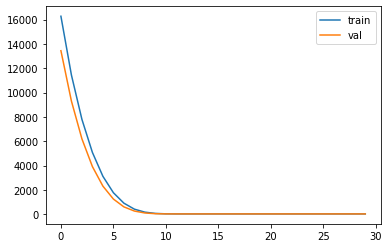

In [10]:
plt.plot(plot_list['train'])
plt.plot(plot_list['val'])

plt.legend(['train','val'])
plt.show()

### 1.2) 다층 퍼셉트론 모델(Multi-Layer Perceptron)을 통해 학습

In [0]:
class MultiLayerModel(nn.Module):
    def __init__(self,input_feature=X.shape[1]):
        super(MultiLayerModel,self).__init__()
        self.layer1 = nn.Linear(input_feature,64)
        self.layer2 = nn.Linear(64,128)
        self.layer3 = nn.Linear(128,128)
        self.layer4 = nn.Linear(128,128)
        self.layer5 = nn.Linear(128,128)
        self.layer6 = nn.Linear(128,128)
        self.layer7 = nn.Linear(128,128)
        self.layer8 = nn.Linear(128,128)
        self.layer9 = nn.Linear(128,128)
        self.layer10 = nn.Linear(128,128)
        self.layer11 = nn.Linear(128,128)
        self.layer12 = nn.Linear(128,128)
        self.layer13 = nn.Linear(128,128)
        self.layer14 = nn.Linear(128,128)
        self.layer15 = nn.Linear(128,128)
        self.layer16 = nn.Linear(128,64)
        self.layer17 = nn.Linear(64,32)
        self.layer18 = nn.Linear(32,1)
    def forward(self,x):
        x = F.elu(self.layer1(x))
        x = F.elu(self.layer2(x))
        x = F.elu(self.layer3(x))
        x = F.elu(self.layer4(x))
        x = F.elu(self.layer5(x))
        x = F.elu(self.layer6(x))
        x = F.elu(self.layer7(x))
        x = F.elu(self.layer8(x))
        x = F.elu(self.layer9(x))
        x = F.elu(self.layer10(x))
        x = F.elu(self.layer11(x))
        x = F.elu(self.layer12(x))
        x = F.elu(self.layer13(x))
        x = F.elu(self.layer14(x))
        x = F.elu(self.layer15(x))
        x = F.elu(self.layer16(x))
        x = F.elu(self.layer17(x))
        x = self.layer18(x)
        return x.squeeze(-1)

In [0]:
cuda_use = True
multi_layer_model = MultiLayerModel()

if cuda_use and torch.cuda.is_available():
    multi_layer_model.cuda()

criterion = nn.MSELoss()
optimizer = optim.Adam(params=multi_layer_model.parameters(),lr=0.01)

In [13]:
plot_list = {'train':[],'val':[]}

for epoch in range(30):
    multi_layer_model.train()
    train_losses = []
    for i, data in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, targets = data
        inputs, targets = inputs.cuda(),targets.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = multi_layer_model(inputs)
        train_loss = criterion(outputs, targets)
        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss)
    

    multi_layer_model.eval()
    for data in val_loader:
        inputs, targets = data
        inputs, targets = inputs.cuda(),targets.cuda()

        outputs = multi_layer_model(inputs)

        val_loss = criterion(outputs,targets)
    print(f"{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}")
    print(f"{epoch+1} epoch val loss = {val_loss}")
    print('--------------------------------------------------')
    plot_list['train'].append(sum(train_losses)/len(train_losses))
    plot_list['val'].append(val_loss)
    
            
print('Finished Training')

1 epoch train loss = 9086.736328125
1 epoch val loss = 6513.419921875
--------------------------------------------------
2 epoch train loss = 27392.587890625
2 epoch val loss = 19601.19921875
--------------------------------------------------
3 epoch train loss = 19459.81640625
3 epoch val loss = 18985.939453125
--------------------------------------------------
4 epoch train loss = 19188.177734375
4 epoch val loss = 18927.8515625
--------------------------------------------------
5 epoch train loss = 19166.63671875
5 epoch val loss = 18926.970703125
--------------------------------------------------
6 epoch train loss = 19174.150390625
6 epoch val loss = 18927.203125
--------------------------------------------------
7 epoch train loss = 19167.28515625
7 epoch val loss = 18933.61328125
--------------------------------------------------
8 epoch train loss = 19173.865234375
8 epoch val loss = 18930.400390625
--------------------------------------------------
9 epoch train loss = 19176.7

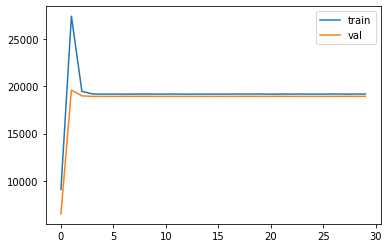

In [14]:
plt.plot(plot_list['train'])
plt.plot(plot_list['val'])

plt.legend(['train','val'])
plt.show()

### 1.3) 잔차학습모델(Residual Learning)을 통해 학습

In [0]:
class RLModel(nn.Module):
    def __init__(self,input_feature=X.shape[1]):
        super(RLModel,self).__init__()
        self.layer1 = nn.Linear(input_feature,64)
        self.layer2 = nn.Linear(64,128)
        self.layer3 = nn.Linear(128,64)
        self.layer4 = nn.Linear(64,input_feature)
        self.layer5 = nn.Linear(input_feature,64)
        self.layer6 = nn.Linear(64,128)
        self.layer7 = nn.Linear(128,64)
        self.layer8 = nn.Linear(64,input_feature)
        self.layer9 = nn.Linear(input_feature,64)
        self.layer10 = nn.Linear(64,128)
        self.layer11 = nn.Linear(128,64)
        self.layer12 = nn.Linear(64,input_feature)
        self.layer13 = nn.Linear(input_feature,64)
        self.layer14 = nn.Linear(64,128)
        self.layer15 = nn.Linear(128,64)
        self.layer16 = nn.Linear(64,input_feature)
        self.layer17 = nn.Linear(input_feature,1)
    def forward(self,x):
        init_x = x
        x = F.elu(self.layer1(x))
        x = F.elu(self.layer2(x))
        x = F.elu(self.layer3(x))
        x = F.elu(self.layer4(x))+init_x
        x = F.elu(self.layer5(x))
        x = F.elu(self.layer6(x))
        x = F.elu(self.layer7(x))
        x = F.elu(self.layer8(x))+init_x
        x = F.elu(self.layer9(x))
        x = F.elu(self.layer10(x))
        x = F.elu(self.layer11(x))
        x = F.elu(self.layer12(x))+init_x
        x = F.elu(self.layer13(x))
        x = F.elu(self.layer14(x))
        x = F.elu(self.layer15(x))
        x = F.elu(self.layer16(x))+init_x
        x = self.layer17(x)
        return x.squeeze(-1)

In [0]:
cuda_use = True
rl_model = RLModel()

if cuda_use and torch.cuda.is_available():
    rl_model.cuda()

criterion = nn.MSELoss()
optimizer = optim.Adam(params=rl_model.parameters(),lr=0.01)

In [17]:
plot_list = {'train':[],'val':[]}

for epoch in range(100):
    rl_model.train()
    train_losses = []
    for i, data in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, targets = data
        inputs, targets = inputs.cuda(),targets.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = rl_model(inputs)
        train_loss = criterion(outputs, targets)
        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss)
    

    rl_model.eval()
    for data in val_loader:
        inputs, targets = data
        inputs, targets = inputs.cuda(),targets.cuda()

        outputs = rl_model(inputs)

        val_loss = criterion(outputs,targets)
    print(f"{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}")
    print(f"{epoch+1} epoch val loss = {val_loss}")
    print('--------------------------------------------------')
    plot_list['train'].append(sum(train_losses)/len(train_losses))
    plot_list['val'].append(val_loss)
    
            
print('Finished Training')

1 epoch train loss = 520.9597778320312
1 epoch val loss = 133.12135314941406
--------------------------------------------------
2 epoch train loss = 139.18783569335938
2 epoch val loss = 62.12962341308594
--------------------------------------------------
3 epoch train loss = 86.96411895751953
3 epoch val loss = 81.93846130371094
--------------------------------------------------
4 epoch train loss = 18429.123046875
4 epoch val loss = 18091.361328125
--------------------------------------------------
5 epoch train loss = 17760.751953125
5 epoch val loss = 16916.2578125
--------------------------------------------------
6 epoch train loss = 16475.099609375
6 epoch val loss = 15538.501953125
--------------------------------------------------
7 epoch train loss = 15028.71875
7 epoch val loss = 14058.138671875
--------------------------------------------------
8 epoch train loss = 13538.513671875
8 epoch val loss = 12617.181640625
--------------------------------------------------
9 epoch 

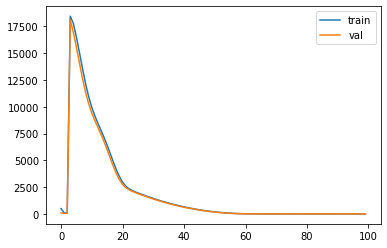

In [18]:
plt.plot(plot_list['train'])
plt.plot(plot_list['val'])

plt.legend(['train','val'])
plt.show()

선형회귀모델보다 성능면에서 우월하다 보기 힘듦

## 2) Boston House Price Data를 바탕으로 실험

In [0]:
from sklearn.datasets import fetch_california_housing

In [20]:
X,y = fetch_california_housing(return_X_y=True)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state = 42)

In [21]:
print(f"X's dimension = {X.shape}")
print(f"y's dimension = {y.shape}")

X's dimension = (20640, 8)
y's dimension = (20640,)


In [0]:
train_dataset = MyDataset(X_train,y_train)
val_dataset = MyDataset(X_val,y_val)

batch_size = 42
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=train_dataset, batch_size=int(X.shape[0]*0.2))

In [23]:
X.shape

(20640, 8)

### 2.1) 선형회귀모델(single layer model)을 통해 학습

In [0]:
cuda_use = True
single_layer_model = SingleLayerModel(input_feature=X.shape[1])

if cuda_use and torch.cuda.is_available():
    single_layer_model.cuda()

criterion = nn.MSELoss()
optimizer = optim.Adam(params=single_layer_model.parameters(),lr=0.01)

In [25]:
plot_list = {'train':[],'val':[]}

for epoch in range(30):
    single_layer_model.train()
    train_losses = []
    for i, data in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, targets = data
        inputs, targets = inputs.cuda(),targets.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = single_layer_model(inputs)
        train_loss = criterion(outputs, targets)
        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss)
    

    single_layer_model.eval()
    for data in val_loader:
        inputs, targets = data
        inputs, targets = inputs.cuda(),targets.cuda()

        outputs = single_layer_model(inputs)

        val_loss = criterion(outputs,targets)
    print(f"{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}")
    print(f"{epoch+1} epoch val loss = {val_loss}")
    print('--------------------------------------------------')
    plot_list['train'].append(sum(train_losses)/len(train_losses))
    plot_list['val'].append(val_loss)
    
            
print('Finished Training')

1 epoch train loss = 96.56082916259766
1 epoch val loss = 1.0894763469696045
--------------------------------------------------
2 epoch train loss = 0.8768700957298279
2 epoch val loss = 0.9952452778816223
--------------------------------------------------
3 epoch train loss = 3.787932872772217
3 epoch val loss = 1.0232563018798828
--------------------------------------------------
4 epoch train loss = 1.7079966068267822
4 epoch val loss = 1.0599771738052368
--------------------------------------------------
5 epoch train loss = 2.0310609340667725
5 epoch val loss = 1.6421263217926025
--------------------------------------------------
6 epoch train loss = 0.9123203754425049
6 epoch val loss = 0.7037009000778198
--------------------------------------------------
7 epoch train loss = 1.1885439157485962
7 epoch val loss = 0.9955016374588013
--------------------------------------------------
8 epoch train loss = 2.778937816619873
8 epoch val loss = 1.102096676826477
-----------------------

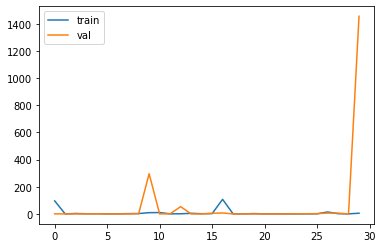

In [26]:
plt.plot(plot_list['train'])
plt.plot(plot_list['val'])

plt.legend(['train','val'])
plt.show()

### 2.2) 다층 퍼셉트론 모델(Multi-Layer Perceptron)을 통해 학습

In [0]:
cuda_use = True
multi_layer_model = MultiLayerModel(input_feature=X.shape[1])

if cuda_use and torch.cuda.is_available():
    multi_layer_model.cuda()

criterion = nn.MSELoss()
optimizer = optim.Adam(params=multi_layer_model.parameters(),lr=0.01)

In [28]:
plot_list = {'train':[],'val':[]}

for epoch in range(30):
    multi_layer_model.train()
    train_losses = []
    for i, data in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, targets = data
        inputs, targets = inputs.cuda(),targets.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = multi_layer_model(inputs)
        train_loss = criterion(outputs, targets)
        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss)
    

    multi_layer_model.eval()
    for data in val_loader:
        inputs, targets = data
        inputs, targets = inputs.cuda(),targets.cuda()

        outputs = multi_layer_model(inputs)

        val_loss = criterion(outputs,targets)
    print(f"{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}")
    print(f"{epoch+1} epoch val loss = {val_loss}")
    print('--------------------------------------------------')
    plot_list['train'].append(sum(train_losses)/len(train_losses))
    plot_list['val'].append(val_loss)
    
            
print('Finished Training')

1 epoch train loss = 8.849424362182617
1 epoch val loss = 1.3446096181869507
--------------------------------------------------
2 epoch train loss = 1.3815112113952637
2 epoch val loss = 1.3552262783050537
--------------------------------------------------
3 epoch train loss = 1.3551950454711914
3 epoch val loss = 1.3872836828231812
--------------------------------------------------
4 epoch train loss = 1.3452682495117188
4 epoch val loss = 1.3681590557098389
--------------------------------------------------
5 epoch train loss = 1.3535535335540771
5 epoch val loss = 1.3454525470733643
--------------------------------------------------
6 epoch train loss = 1.3519291877746582
6 epoch val loss = 1.3460893630981445
--------------------------------------------------
7 epoch train loss = 1.3501840829849243
7 epoch val loss = 1.3482351303100586
--------------------------------------------------
8 epoch train loss = 1.3571699857711792
8 epoch val loss = 1.3518227338790894
--------------------

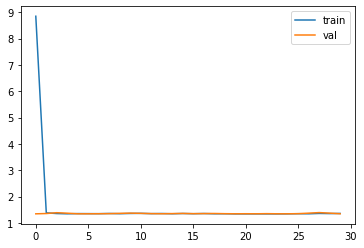

In [29]:
plt.plot(plot_list['train'])
plt.plot(plot_list['val'])

plt.legend(['train','val'])
plt.show()

### 2.3) 잔차학습모델(Residual Learning)을 통해 학습

In [0]:
cuda_use = True
rl_model = RLModel(input_feature=X.shape[1])

if cuda_use and torch.cuda.is_available():
    rl_model.cuda()

criterion = nn.MSELoss()
optimizer = optim.Adam(params=rl_model.parameters(),lr=0.01)

In [31]:
plot_list = {'train':[],'val':[]}

for epoch in range(100):
    rl_model.train()
    train_losses = []
    for i, data in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, targets = data
        inputs, targets = inputs.cuda(),targets.cuda()
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = rl_model(inputs)
        train_loss = criterion(outputs, targets)
        train_loss.backward()
        optimizer.step()

        train_losses.append(train_loss)
    

    rl_model.eval()
    for data in val_loader:
        inputs, targets = data
        inputs, targets = inputs.cuda(),targets.cuda()

        outputs = rl_model(inputs)

        val_loss = criterion(outputs,targets)
    print(f"{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}")
    print(f"{epoch+1} epoch val loss = {val_loss}")
    print('--------------------------------------------------')
    plot_list['train'].append(sum(train_losses)/len(train_losses))
    plot_list['val'].append(val_loss)
    
            
print('Finished Training')

1 epoch train loss = 4823.6953125
1 epoch val loss = 43.23747253417969
--------------------------------------------------
2 epoch train loss = 6.206406116485596
2 epoch val loss = 12.878318786621094
--------------------------------------------------
3 epoch train loss = 4.306884288787842
3 epoch val loss = 1.5949207544326782
--------------------------------------------------
4 epoch train loss = 1.7253327369689941
4 epoch val loss = 1.0145316123962402
--------------------------------------------------
5 epoch train loss = 565.7227172851562
5 epoch val loss = 91.48136138916016
--------------------------------------------------
6 epoch train loss = 17.176469802856445
6 epoch val loss = 1.277392864227295
--------------------------------------------------
7 epoch train loss = 1.3725917339324951
7 epoch val loss = 1.1653605699539185
--------------------------------------------------
8 epoch train loss = 1.1469743251800537
8 epoch val loss = 1.189156174659729
--------------------------------

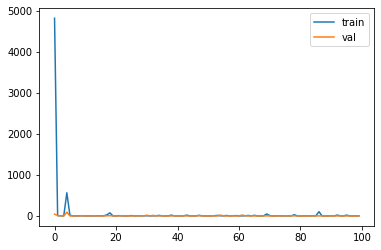

In [32]:
plt.plot(plot_list['train'])
plt.plot(plot_list['val'])

plt.legend(['train','val'])
plt.show()